# Plot MACD data per individual stock
for ticker in tickers:  
    
    ax1 = plt.subplot2grid((15,1), (0,0), rowspan = 5, colspan = 1)
    
    ax2 = plt.subplot2grid((15,1), (7,0), rowspan = 3, colspan = 1)

    ax1.plot(tickers_df["Close"], color = 'gray', linewidth = 2, label = ticker)
    
    ax1.set_title(f'{ticker} MACD SIGNALS')
    
    ax2.plot(macd_list[ticker]['macd'],
             color = 'skyblue',
             linewidth = 1.5, 
             label = 'MACD')
    
    ax2.plot(macd_list[ticker]['signal'],
             color = 'orange',
             linewidth = 1.5,
             label = 'SIGNAL')

    for i in range(len(macd_list[ticker])):
        
        if str(macd_list[ticker]['hist'][i])[0] == '-':
            
            ax2.bar(macd_list[ticker].index[i], 
                    macd_list[ticker]['hist'][i],
                    color = 'red')
        else:
            
            ax2.bar(macd_list[ticker].index[i], 
                    macd_list[ticker]['hist'][i], 
                    color = 'green')
    
    plt.legend(loc = 'lower right')
    
    plt.show()# MACD algotrading and backtesting

In [9]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

import yfinance as yf

import vectorbt as vbt

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

## Data collection

In [10]:
# Names of intersted stocks
# tickers = ['ABBV', 'PFE', 'BAC', 'COKE', 'SQ', 'AAPL', 'AMD', 'FDX',
#            'EBAY', 'AMZN', 'C','F', 'GDX', 'USO']

tickers = ["AMZN"]

In [3]:
# tickers_df = yf.download(tickers = tickers,
#                          start = "2020-01-01", 
#                          period="max", 
#                          interval = "1d",
#                          group_by = "ticker")

# tickers_df.tail()

In [13]:
tickers_df = pd.read_csv("Pred_TimeSeries.csv")

tickers_df[["Close"]]

tickers_df.head()

,Date,Close
0,2015-12-31,675.890015
1,2016-01-04,636.989990
2,2016-01-05,633.789978
3,2016-01-06,632.650024
4,2016-01-07,607.940002


## MACD calcualtion and plots

In [5]:
# Calculate MACD data and add to dictionary
macd_list = {}

for ticker in tickers:
    
    # MACD data
    ewm_fast = tickers_df["Close"].ewm(span = 12, adjust = False).mean()
    
    ewm_slow = tickers_df["Close"].ewm(span = 26, adjust = False).mean()
    
    macd = pd.DataFrame(ewm_fast - ewm_slow)
    
    macd = macd.rename(columns = {"Close":"macd"})
    
    # Signal data
    signal = pd.DataFrame(macd["macd"].ewm(span = 9, adjust = False).mean()).rename(columns = {"macd":"signal"})
    
    # Histogram data
    histogram = pd.DataFrame(macd["macd"] - signal["signal"]).rename(columns = {0:("hist")})
    
    ticker_macd = pd.concat([macd, signal, histogram],
                            axis = 1)
    
    macd_list[ticker] = ticker_macd

In [6]:
macd_list["AMZN"]["hist"]

Date
2015-12-31    0.000000
2016-01-04   -2.482509
2016-01-05   -4.106919
2016-01-06   -4.967507
2016-01-07   -6.797097
                ...   
2021-11-20    0.014428
2021-11-21    0.013355
2021-11-22    0.012362
2021-11-23    0.011443
2021-11-24    0.010592
Name: hist, Length: 1515, dtype: float64

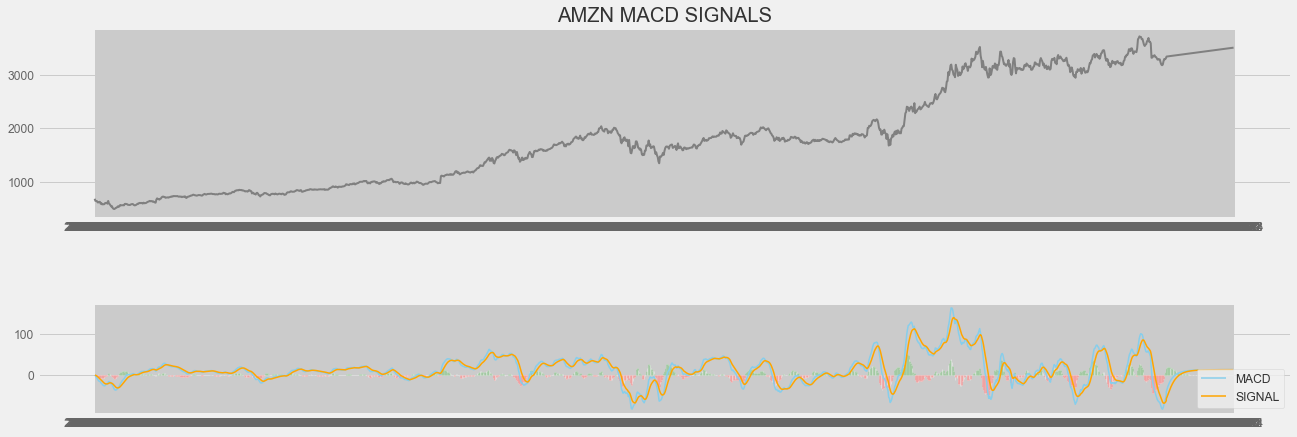

In [7]:
# Plot MACD data per individual stock
for ticker in tickers:  
    
    ax1 = plt.subplot2grid((15,1), (0,0), rowspan = 5, colspan = 1)
    
    ax2 = plt.subplot2grid((15,1), (7,0), rowspan = 3, colspan = 1)

    ax1.plot(tickers_df["Close"], color = 'gray', linewidth = 2, label = ticker)
    
    ax1.set_title(f'{ticker} MACD SIGNALS')
    
    ax2.plot(macd_list[ticker]['macd'],
             color = 'skyblue',
             linewidth = 1.5, 
             label = 'MACD')
    
    ax2.plot(macd_list[ticker]['signal'],
             color = 'orange',
             linewidth = 1.5,
             label = 'SIGNAL')

    for i in range(len(macd_list[ticker])):
        
        if str(macd_list[ticker]['hist'][i])[0] == '-':
            
            ax2.bar(macd_list[ticker].index[i], 
                    macd_list[ticker]['hist'][i],
                    color = 'red')
        else:
            
            ax2.bar(macd_list[ticker].index[i], 
                    macd_list[ticker]['hist'][i], 
                    color = 'green')
    
    plt.legend(loc = 'lower right')
    
    plt.show()

In [ ]:
# Create Trading Strategy function
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    # For loop for range of dates
    for i in range(len(data)):
        
        # Conditional produce signal to buy stock
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
                
        # Conditional produce signal to sell stock
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal

## MACD calcualtion and plots

In [7]:
# # Calculate MACD data and add to dictionary
# macd_list = {}

# for ticker in tickers:
    
#     # MACD data
#     ewm_fast = tickers_df["Close"].ewm(span = 12, adjust = False).mean()
    
#     ewm_slow = tickers_df["Close"].ewm(span = 26, adjust = False).mean()
    
#     macd = pd.DataFrame(ewm_fast - ewm_slow)
    
#     macd = macd.rename(columns = {"Close":"macd"})
    
#     # Signal data
#     signal = pd.DataFrame(macd["macd"].ewm(span = 9, adjust = False).mean()).rename(columns = {"macd":"signal"})
    
#     # Histogram data
#     histogram = pd.DataFrame(macd["macd"] - signal["signal"]).rename(columns = {0:("hist")})
    
#     ticker_macd = pd.concat([macd, signal, histogram], 
#                             join = "inner",
#                             axis = 1)
    
#     macd_list[ticker] = ticker_macd

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [29]:
macd_list["AMZN"]["hist"]

Date
2019-12-31     0.000000
2020-01-02     3.201735
2020-01-03     3.563021
2020-01-06     5.368424
2020-01-07     6.444933
                ...    
2021-08-23   -10.355039
2021-08-24    -2.076425
2021-08-25     3.422690
2021-08-26     8.378215
2021-08-27    13.786920
Name: hist, Length: 419, dtype: float64

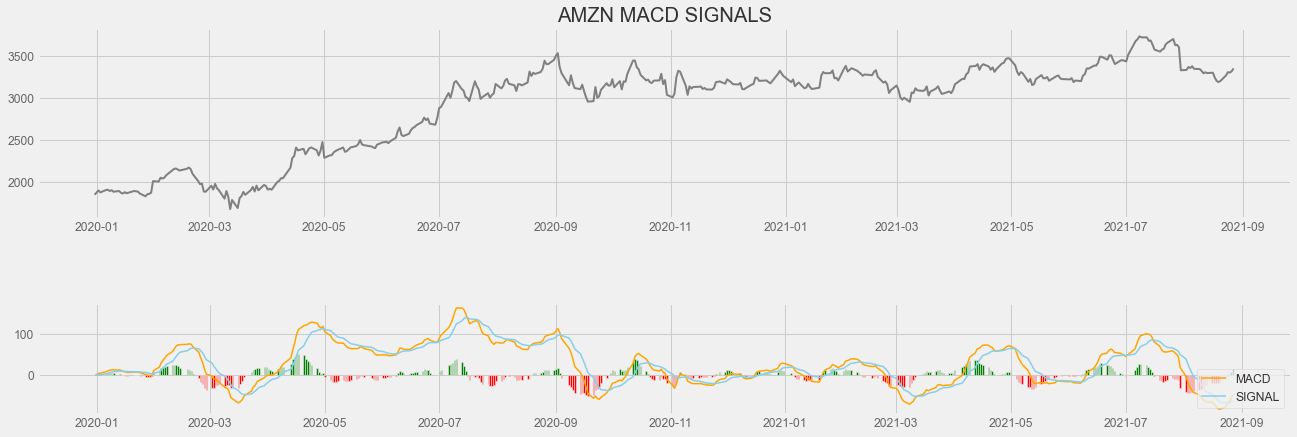

In [51]:
# Plot MACD data per individual stock
for ticker in tickers:  
    
    ax1 = plt.subplot2grid((15,1), (0,0), rowspan = 5, colspan = 1)
    
    ax2 = plt.subplot2grid((15,1), (7,0), rowspan = 3, colspan = 1)

    ax1.plot(tickers_df["Close"], color = 'gray', linewidth = 2, label = ticker)
    
    ax1.set_title(f'{ticker} MACD SIGNALS')
    
    ax2.plot(macd_list[ticker]['macd'],
             color = 'skyblue',
             linewidth = 1.5, 
             label = 'MACD')
    
    ax2.plot(macd_list[ticker]['signal'],
             color = 'orange',
             linewidth = 1.5,
             label = 'SIGNAL')

    for i in range(len(macd_list[ticker])):
        
        if str(macd_list[ticker]['hist'][i])[0] == '-':
            
            ax2.bar(macd_list[ticker].index[i], 
                    macd_list[ticker]['hist'][i],
                    color = 'red')
        else:
            
            ax2.bar(macd_list[ticker].index[i], 
                    macd_list[ticker]['hist'][i], 
                    color = 'green')
    
    plt.legend(loc = 'lower right')
    
    plt.show()

## Trading Strategy based on MACD

In [31]:
# Create Trading Strategy function
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    # For loop for range of dates
    for i in range(len(data)):
        
        # Conditional produce signal to buy stock
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
                
        # Conditional produce signal to sell stock
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal

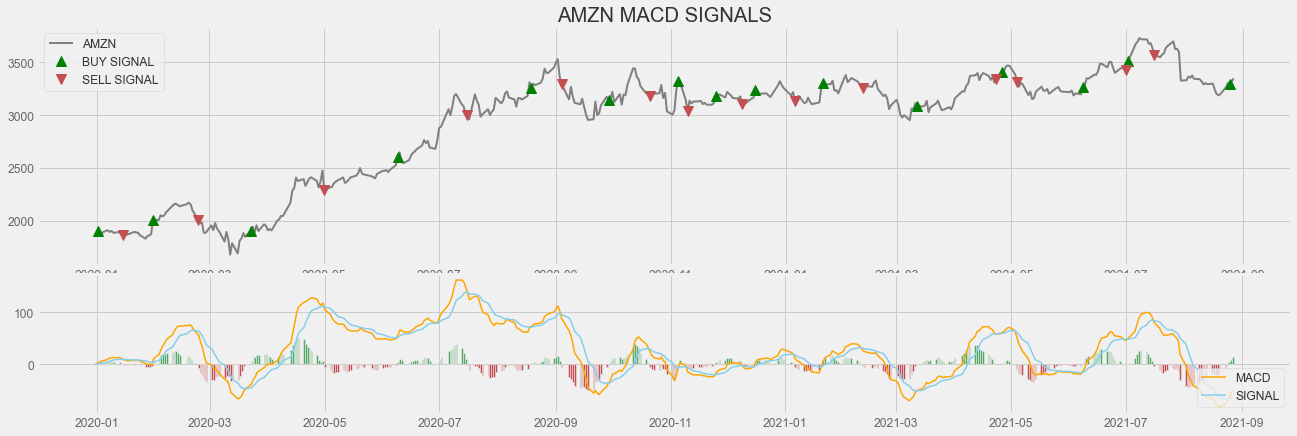

In [35]:
# Run trade strategy and plot buy and sell signals
for ticker in tickers:  
    
    buy_price, sell_price, macd_signal = implement_macd_strategy(tickers_df["Close"], macd_list[ticker])

    ax1 = plt.subplot2grid((12,1), (0,0), rowspan = 5, colspan = 1)
    
    ax2 = plt.subplot2grid((12,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(tickers_df["Close"], 
             color = 'gray',
             linewidth = 2,
             label = ticker)
    
    ax1.plot(tickers_df["Close"].index,
             buy_price, 
             marker = '^',
             color = 'green', 
             markersize = 10, 
             label = 'BUY SIGNAL',
             linewidth = 0)
    
    ax1.plot(tickers_df["Close"].index,
             sell_price, 
             marker = 'v', 
             color = 'r',
             markersize = 10,
             label = 'SELL SIGNAL',
             linewidth = 0)
    
    ax1.legend()
    
    ax1.set_title(f'{ticker} MACD SIGNALS')
    
    ax2.plot(macd_list[ticker]['macd'],
             color = 'skyblue',
             linewidth = 1.5, 
             label = 'MACD')
    
    ax2.plot(macd_list[ticker]['signal'], 
             color = 'orange', 
             linewidth = 1.5,
             label = 'SIGNAL')

    for i in range(len(macd_list[ticker])):
        
        if str(macd_list[ticker]['hist'][i])[0] == '-':
            
            ax2.bar(macd_list[ticker].index[i],
                    macd_list[ticker]['hist'][i], 
                    color = 'r')
        else:
            
            ax2.bar(macd_list[ticker].index[i],
                    macd_list[ticker]['hist'][i], 
                    color = 'g')
        
    plt.legend(loc = 'lower right')
    
    plt.show()
    

In [38]:
# Run strategy to create position
stock_strategy = {}

for ticker in tickers:            
    
    buy_price, sell_price, macd_signal = implement_macd_strategy(tickers_df["Close"], macd_list[ticker])

    position = []
    
    for i in range(len(macd_signal)):
        
        if macd_signal[i] > 1:
            position.append(0)
        else:
            position.append(1)
            
    for i in range(len(tickers_df['Close'])):
        
        if macd_signal[i] == 1:
            position[i] = 1
        elif macd_signal[i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]
            
    macd = macd_list[ticker]['macd']
    
    signal = macd_list[ticker]['signal']
    
    close_price = tickers_df["Close"]
    
    macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(tickers_df["Close"].index)
    
    position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(tickers_df["Close"].index)

    frames = [close_price, 
              macd,
              signal,
              macd_signal,
              position]
    
    strategy = pd.concat(frames, join = 'inner', axis = 1)

    stock_strategy[ticker] = strategy

In [45]:
stock_strategy["AMZN"]["macd_signal"]

Date
2019-12-31    0
2020-01-02    1
2020-01-03    0
2020-01-06    0
2020-01-07    0
             ..
2021-08-23    0
2021-08-24    0
2021-08-25    1
2021-08-26    0
2021-08-27    0
Name: macd_signal, Length: 419, dtype: int64

## Backtesting

In [46]:
# Create dictionary and populate according to macd_signal
stock_signals = {}

for ticker in tickers:
    entries = []
    exits = []
    
    for sig in stock_strategy[ticker]["macd_signal"]:
        
        if sig == -1:
            entries.append("False")
            exits.append("True")
        elif sig == 1:
            entries.append("True")
            exits.append("False")
        else:
            entries.append("False")
            exits.append("False")
            
    entries = pd.Series(entries,
                        index = tickers_df["Close"].index)
    
    exits = pd.Series(exits, 
                      index = tickers_df["Close"].index)
    
    # Change type to bool
    entries = entries == "True"
    exits = exits == "True"
    
    # Create dataframe
    entries = pd.DataFrame(entries).rename(columns = {0:'entries'}).set_index(tickers_df["Close"].index)
    
    exits = pd.DataFrame(exits).rename(columns = {0:'exits'}).set_index(tickers_df["Close"].index)
    
    close_price = tickers_df["Close"]
    
    frames = [close_price,
              entries, 
              exits]
    
    signals = pd.concat(frames, join = 'inner', axis = 1)

    stock_signals[ticker] = signals

In [47]:
init_cash = 100000

In [48]:
# Total profit earned from holding stock. Timeframe 3 months
for ticker in tickers:
    
    price = vbt.YFData.download(ticker, period='6mo').get('Close')
    
    portfolio = vbt.Portfolio.from_holding(price,
                                           init_cash = init_cash)
    
portfolio.total_profit() 

print(f"The total profit of just holding the stock is ${portfolio.total_profit():.2f}")

The total profit ofjust holding the stocks is $6467.93


In [49]:
total_profit = []

for ticker in tickers:
    
    # Build portfolio using macd signals
    portfolio = vbt.Portfolio.from_signals(stock_signals[ticker]["Close"],
                                           stock_signals[ticker]["entries"], 
                                           stock_signals[ticker]["exits"], 
                                           init_cash = init_cash)

    # Total profit
    total_profit.append(portfolio.total_profit())
    
print(f"The total profit of exercising MACD signals are ${sum(total_profit):.2f}")

The total profit of exercising MACD signals are $35143.18


In [60]:
total_weighted = []

size = 100

for ticker in tickers:
    
    price = vbt.YFData.download(ticker, period='6mo').get('Close')
    
    pf = vbt.Portfolio.from_orders(price,
                                   size, 
                                   size_type='targetpercent',
                                   group_by=True,  # group of two columns
                                   cash_sharing=True)  # share capital between columns
    
    total_weighted.append(pf.total_weighted())
    
total_weighted

AttributeError: 'Portfolio' object has no attribute 'total_weighted'

In [61]:
price = vbt.YFData.download(ticker, period='6mo').get('Close')

pf = vbt.Portfolio.from_orders(price,
                               size, 
                               size_type='targetpercent',
                               group_by=True,  # group of two columns
                               cash_sharing=True)  # share capital between columns

pf

In [ ]:

close = vbt.YFData.download(["BTC-USD", "ETH-USD"], missing_index='drop').get('Close')
size = pd.DataFrame.vbt.empty_like(close, fill_value=np.nan)
size.iloc[0] = [0.3, 0.7]  # starting weights

pf = vbt.Portfolio.from_orders(
    close, 
    size, 
    size_type='targetpercent', 
    group_by=True,  # group of two columns
    cash_sharing=True  # share capital between columns